<a href="https://colab.research.google.com/github/handielg/Python/blob/main/Copia_de_Course_1_Part_4_Lesson_2_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Más allá de Hello World, un ejemplo de visión artificial

En este apartado le decimos a la red que es una camisa etc, y esta encuentra los patrones que le permiten identificar luego por si misma que es cada cosa.

En el ejercicio anterior, vio cómo crear una red neuronal que descubrió el problema que estaba tratando de resolver. Esto dio un ejemplo explícito de comportamiento aprendido. Por supuesto, en ese caso, fue un poco exagerado porque hubiera sido más fácil escribir la función Y = 2x-1 directamente, en lugar de molestarse en usar Machine Learning para aprender la relación entre X e Y para un conjunto fijo de valores, y extendiendo eso para todos los valores.

Pero, ¿qué pasa con un escenario en el que escribir reglas como esa es mucho más difícil, por ejemplo, un problema de visión por computadora? Echemos un vistazo a un escenario en el que podemos reconocer diferentes prendas de vestir, entrenadas a partir de un conjunto de datos que contiene 10 tipos diferentes.

## Comenzar a codificar

Comencemos con nuestra importación de TensorFlow

In [ ]:
import tensorflow as tf
print(tf.__version__)

Los datos de Fashion MNIST están disponibles directamente en la API de conjuntos de datos de tf.keras. Lo cargas así:

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a load_data en este objeto le dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas y sus etiquetas.

In [ ]:
#Tenemos 6000 imágenes para entrenamiento y 1000 para test.
(training_images, training_labels), (test_images, test_labels) = mnist.load_data() #estas son la imágenes y sus etiquetas para entrenamiento y prueba respectivamente.

¿Cómo se ven estos valores? Imprimamos una imagen de entrenamiento y una etiqueta de entrenamiento para ver ... Experimente con diferentes índices en la matriz. Por ejemplo, también eche un vistazo al índice 42 ... es un arranque diferente al del índice 0.

Las imágenes está, en escala de grises, por lo que la info ha sido reducida. Cada pixel puede ser representado en valores de 0 a 255, y solo es un byte por pixel. Estas imágenes tienen 28x28 pixeles.Solo 74 bytes son necesarios para almacenar toda la imagen. Los valores que imprimimos a continuación son los valores de cada pixel.


In [ ]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0]) #podemos cambiar los valores dentro d los corchetes, de este y los siguientes para ver otras imágenes.
print("Esta imagen es un botín, y su etiqueta es un 9. Está bien etiquetarla con un número porque así no condicionamos ningún idioma")
print(training_labels[0])
print(training_images[0])

Notará que todos los valores en el número están entre 0 y 255. Si estamos entrenando una red neuronal, por varias razones, es más fácil si tratamos todos los valores entre 0 y 1, un proceso llamado '**normalización** '... y afortunadamente en Python es fácil normalizar una lista como esta sin hacer bucles. Lo haces así, dividimos cada vector entre 255:

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Ahora puede que te preguntes por qué hay 2 conjuntos ... entrenamiento y prueba. ¿Recuerdas que hablamos de esto en la introducción? La idea es tener 1 conjunto de datos para el entrenamiento, y luego otro conjunto de datos ... que el modelo aún no ha visto ... para ver qué tan bueno sería clasificando valores. Después de todo, cuando haya terminado, querrá probarlo con datos que no había visto anteriormente.

Diseñemos ahora el modelo. Hay bastantes conceptos nuevos aquí, pero no se preocupe, los dominará.

Creamos un modelo secuencial con 3 capas. La última capa tiene 10 neuronas, porque tenemos 10 clases de ropa en el conjunto de datos y esto debe coincidir. La primera capa es una capa flatten con la forma de entrada de 28 * 28. Estamos especificando que la forma que debemos esperar de nuestros datos de entrada es 28*28. Con flatten tomamos este vector simple de 28*28 y lo convertimos en un vector lineal simple. Con este vector lineal encontramos la ecuación que permite obtener un 9 a partir de los pesos (w) específicos.

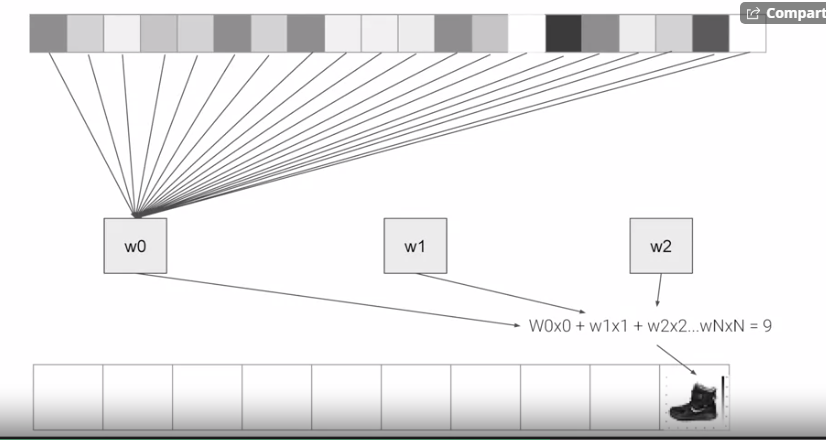

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: que define una SECUENCIA de capas en la red neuronal

**Flatten**: ¿Recuerdas antes donde nuestras imágenes eran un cuadrado, cuando las imprimiste? Flatten solo toma ese cuadrado y lo convierte en un conjunto de 1 dimensión.

**Dense**: agrega una capa de neuronas

Cada capa de neuronas necesita una ** función de activación ** para indicarles qué hacer. Hay muchas opciones, pero úsalas por ahora.

**Relu** significa efectivamente "Si X> 0 devuelve X, de lo contrario devuelve 0", por lo que lo que hace solo pasa valores 0 o mayores a la siguiente capa de la red.

**Softmax** toma un conjunto de valores y efectivamente elige el más grande, por ejemplo, si la salida de la última capa se ve como [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05 ], te evita tener que pescar a través de él buscando el mayor valor, y lo convierte en [0,0,0,0,1,0,0,0,0] - ¡El objetivo es ahorrar mucho código!


Lo siguiente que debe hacer, ahora que el modelo está definido, es construirlo. Para hacer esto, compilalo con un optimizador y una función de pérdida como antes, y luego lo entrena llamando a ** model.fit ** pidiéndole que ajuste sus datos de entrenamiento a sus etiquetas de entrenamiento, es decir, que averigüe la relación entre los datos de entrenamiento y sus etiquetas reales, por lo que en el futuro, si tiene datos que se parecen a los datos de entrenamiento, entonces puede hacer una predicción de cómo se verían esos datos.

De igual forma que en la clase anterior, definimos la función de pérdida y el optimizador, y como antes, el objetivo de estos es hacer una conjetura de cual es la relación entre los datos de entrada y los de salida. Medimos lo bien o mal que lo hace con la función de pérdida y generamos otra conjetura con el optimizador.

In [ ]:
#Este el el código principal de entrenamiento.
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10)

En esta línea siguiente implementaremos una función que hace una retrollamada, cada vez que un epoch termina. Como cada pérdida actual está registrada, podemos parar el entrenamiento cuando la función de pérdida alcance el valor que indiquemos. En el código principal de entrenamiento debemos hacer algunos cambios.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if (logs.get("loss")<0.1): #indicamos que valor debe tener la función de pérdida para que pare el entrenamiento.
      print("\n La función de pérdida ha alcanzado el límite indicado")
      self.model.stop_training = True

callbacks = myCallback()
#Este el el código principal de entrenamiento.
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=100, callbacks = [callbacks]) #aqui hay un cambio.
print("Vemos que hemos indicado 5 epochs pero ha terminado justo después del segundo")

En este otro código definimos que valor debe tener la precisión (accuracy) para detener el entrenamiento:

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Una vez que haya terminado el entrenamiento, debería ver un valor de precisión al final de la época final. Puede parecer algo así como 0.9098. Esto le indica que su red neuronal tiene una precisión del 91% en la clasificación de los datos de entrenamiento. Es decir, descubrió una coincidencia de patrón entre la imagen y las etiquetas que funcionó el 91% del tiempo. No es genial, pero no está mal teniendo en cuenta que solo se entrenó durante 5 épocas y se hizo con bastante rapidez.

Pero, ¿cómo funcionaría con datos invisibles? Por eso tenemos las imágenes de prueba. Podemos llamar model.evaluate y pasar los dos conjuntos, e informará la pérdida de cada uno. Hagamos un intento:

In [ ]:
model.evaluate(test_images, test_labels)

Para mí, eso arrojó una precisión de aproximadamente .8838, lo que significa que fue aproximadamente un 88% de precisión. Como se esperaba, probablemente no funcionaría tan bien con datos * no vistos * como lo hizo con los datos en los que se entrenó. A medida que avance en este curso, verá formas de mejorarlo. La pérdida es de alrededor 0.345, lo que significa que es un poco menos preciso en el conjunto de prueba.

Para explorar más, pruebe los siguientes ejercicios:


# Exploration Exercises

###Ejercicio 1:
Para este primer ejercicio, ejecute el siguiente código: Crea un conjunto de clasificaciones para cada una de las imágenes de prueba y luego imprime la primera entrada en las clasificaciones. La salida, después de ejecutarla, es una lista de números. ¿Por qué crees que es así y qué representan esos números?

In [ ]:
classifications = model.predict(test_images)

print(classifications[0])

Sugerencia: intente ejecutar print (test_labels [0]), y obtendrá un 9. ¿Eso le ayuda a comprender por qué esta lista se ve como es?

In [ ]:
print(test_labels[0])

### ¿Qué representa esta lista?


1. Son 10 valores aleatorios sin sentido
2. Son las primeras 10 clasificaciones que hizo la computadora
3. Es la probabilidad de que este elemento sea de cada una de las 10 clases


####Responder:
La respuesta correcta es (3)

La salida del modelo es una lista de 10 números. Estos números son una probabilidad de que el valor que se está clasificando sea el valor correspondiente (https://github.com/zalandoresearch/fashion-mnist#labels), es decir, el primer valor de la lista es la probabilidad de que la imagen sea de un '0 '(Camiseta / top), el siguiente es un' 1 '(pantalón), etc. Note que todas son probabilidades MUY BAJAS.

Para el 9 (botín), la probabilidad estaba en los 90, es decir, la red neuronal nos dice que es casi seguro que sea un 7.

### ¿Cómo sabes que esta lista te dice que el artículo es un botín?


1. No hay suficiente información para responder esa pregunta.
2. El décimo elemento de la lista es el más grande y el botín tiene la etiqueta 9
2. El botín es la etiqueta 9 y hay 0-> 9 elementos en la lista


####Responder
La respuesta correcta es (2). Tanto la lista como las etiquetas se basan en 0, por lo que el botín con la etiqueta 9 significa que es el décimo de las 10 clases. La lista que tiene el décimo elemento como el valor más alto significa que la red neuronal ha predicho que el elemento que está clasificando es muy probablemente un botín

##Ejercicio 2:
Veamos ahora las capas de su modelo. Experimente con diferentes valores para la capa densa con 512 neuronas. ¿Qué resultados diferentes obtienes por pérdida, tiempo de entrenamiento, etc.? ¿Por qué crees que ese es el caso?


In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

### Pregunta 1. Aumento a 1024 neuronas: ¿Cuál es el impacto?

1. El entrenamiento lleva más tiempo, pero es más preciso
2. El entrenamiento lleva más tiempo, pero no afecta la precisión
3. El entrenamiento lleva el mismo tiempo, pero es más preciso

####Responder
La respuesta correcta es (1) al agregar más neuronas, tenemos que hacer más cálculos, lo que ralentiza el proceso, pero en este caso tienen un buen impacto: nos volvemos más precisos. Eso no significa que siempre sea un caso de 'más es mejor', ¡puede alcanzar la ley de rendimientos decrecientes muy rápidamente!

## Ejercicio 3:

¿Qué pasaría si eliminas la capa Flatten ()? ¿Por qué crees que ese es el caso?

Obtiene un error sobre la forma de los datos. Puede parecer vago en este momento, pero refuerza la regla general de que la primera capa de su red debe tener la misma forma que sus datos. En este momento, nuestros datos son imágenes de 28x28, y 28 capas de 28 neuronas serían inviables, por lo que tiene más sentido 'aplanar' esas 28,28 en un 784x1. En lugar de escribir todo el código para manejar eso nosotros mismos, agregamos la capa Flatten () al principio, y cuando las matrices se cargan en el modelo más tarde, automáticamente se aplanarán para nosotros.

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

## Ejercicio 4:

Considere las capas finales (de salida). ¿Por qué hay 10 de ellos? ¿Qué pasaría si tuvieras una cantidad diferente a 10? Por ejemplo, intente entrenar la red con 5

Obtiene un error tan pronto como encuentra un valor inesperado. Otra regla general: la cantidad de neuronas en la última capa debe coincidir con la cantidad de clases para las que está clasificando. En este caso, son los dígitos 0-9, por lo que hay 10 de ellos, por lo tanto, debe tener 10 neuronas en su capa final.

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

## Ejercicio 5:

Considere los efectos de capas adicionales en la red. ¿Qué pasará si agregas otra capa entre la que tiene 512 y la capa final con 10?

Respuesta: No hay un impacto significativo, porque se trata de datos relativamente simples. Para datos mucho más complejos (incluidas las imágenes en color que se clasificarán como flores que verá en la siguiente lección), a menudo se necesitan capas adicionales.

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

# Ejercicio 6:

Considere el impacto del entrenamiento durante más o menos épocas. ¿Por qué crees que sería así?

Pruebe 15 épocas: probablemente obtendrá un modelo con una pérdida mucho mejor que el que tiene 5
Pruebe 30 épocas; es posible que vea que el valor de pérdida deja de disminuir y, a veces, aumenta. Este es un efecto secundario de algo llamado "sobreajuste" del cual puede aprender [en algún lugar] y es algo que debe tener en cuenta cuando entrene redes neuronales. No tiene sentido perder el tiempo entrenando si no está mejorando su pérdida, ¿verdad? :)

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

# Ejercicio 7:

Antes de entrenar, normalizó los datos, pasando de valores que eran 0-255 a valores que eran 0-1. ¿Cuál sería el impacto de eliminar eso? Aquí está el código completo para probarlo. ¿Por qué crees que obtienes resultados diferentes? 

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

# Ejercicio 8:

Antes, cuando entrenó para épocas adicionales, tuvo un problema en el que su pérdida podría cambiar. Es posible que te haya llevado un poco de tiempo esperar a que el entrenamiento lo haga, y quizás hayas pensado '¿no sería bueno si pudiera detener el entrenamiento cuando alcance el valor deseado?' - es decir, el 95% de precisión podría ser suficiente para ti, y si lo alcanzas después de 3 épocas, ¿por qué quedarte esperando a que termine muchas más épocas ... Entonces, ¿cómo arreglarías eso? Como cualquier otro programa ... ¡tienes devoluciones de llamada! Veámoslos en acción ...

In [ ]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])
